<a href="https://colab.research.google.com/github/wangwenchih/Nccu_Geomatics/blob/main/Geodesic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from math import *
def dms2rad(dms):
  rad=(dms[0]+dms[1]/60+dms[2]/3600)/180*math.pi
  return rad
def rad2dms(rad):
  deg=rad*180/math.pi
  d=int(deg)
  ms=(deg-d)*60
  m=int(ms)
  s=(ms-m)*60
  dms=[d,m,s]
  return dms
a=6378245;b=6356863.0187730473;e2=1-b**2/a**2;
L1=[114,20,0];B1=[30,30,0];L2=[51,16,32.4976];B2=[-37,-43,-44.1351];
L1=dms2rad(L1)
B1=dms2rad(B1)
L2=dms2rad(L2)
B2=dms2rad(B2)

sin_u1=sin(B1)*(1-e2)**0.5/(1-e2*sin(B1)**2)**0.5
sin_u2=sin(B2)*(1-e2)**0.5/(1-e2*sin(B2)**2)**0.5
cos_u1=cos(B1)/(1-e2*sin(B1)**2)**0.5
cos_u2=cos(B2)/(1-e2*sin(B2)**2)**0.5
a1=sin_u1*sin_u2
a2=cos_u1*cos_u2
b1=cos_u1*sin_u2
b2=sin_u1*cos_u2
lam_0=L2-L1

def  delta_iteration(del0):
  lam=lam_0+del0
  p=cos_u2*sin(lam)
  q=b1-b2*cos(lam)
  A1=atan(p/q)
  if (p*q>0):
    A1=abs(A1)
  else:
    A1=-abs(A1)

  if (q<0):
    A1=math.pi+A1

  sin_sig=p*sin(A1)+q*cos(A1)
  cos_sig=a1+a2*cos(lam)
  sig=atan(sin_sig/cos_sig)
  if (cos_sig>0):
    sig=abs(sig)
  else:
    sig=math.pi-abs(sig)

  sin_A0=cos_u1*sin(A1)
  cos2_A0=1-sin_A0**2
  alp=(e2/2+e2**2/8+e2**3/16)-(e2**2+e2**3)*cos2_A0/16+3*e2**3*cos2_A0**2/128
  beta=((e2**2+e2**3)*cos2_A0/32-e2**3*cos2_A0**2/64)
  #beta=(28189-94*cos2_A0)*1e-10/2
  x=2*a1-cos2_A0*cos_sig
  delt=(alp*sig-2*beta*x*sin_sig)*sin_A0
 
  print(alp,delt*206264.8)
  if abs(delt-del0)>1e-20:
    [lam,A1,sig,x,cos2_A0]=delta_iteration(delt);
  return [lam,A1,sig,x,cos2_A0]

[lam,A1,sig,x,cos2_A0]=delta_iteration(0)
y=(cos2_A0**2-2*x**2)*cos(sig)

k2=(a**2/b**2-1)*cos2_A0

A=b*(1+k2/4-3/64*k2**2+5/256*k2**3)
B=b*(k2/8-k2**2/32+15/1024*k2**3)
C=b*(k2**2/128-3/512*k2**3)

S=A*sig+(x*2*B/cos2_A0+y*2*C/cos2_A0**2)*sin(sig)
A2=atan(cos_u1*sin(lam)/(b1*cos(lam)-b2))
A1=rad2dms(A1)
A2=rad2dms(A2)

print(A1,A2,S)

0.0033505584808237493 -660.9206301166038
0.003350561868032787 -662.8173918831983
0.0033505618777422397 -662.8228349811413
0.0033505618777701024 -662.8228506010836
0.0033505618777701827 -662.8228506459078
0.003350561877770183 -662.8228506460365
0.003350561877770183 -662.8228506460367
0.003350561877770183 -662.8228506460367
[224, 59, 59.959015891579384] [50, 21, 22.439939075379698] 9999998.467513697


# Vincenty method  反算   
參考 [mydeodesy.id.au](http://www.mygeodesy.id.au/documents/Geodesics%20-%20Bessel%20method.pdf#page=63&zoom=auto,-179,822)

In [ ]:
a=6378245;b=6356863.018770473;e2=1-b**2/a**2;f=1-b/a;
L1=[114,20,0];B1=[30,30,0];L2=[51,16,32.4976];B2=[-37,-43,-44.1351];
L1=dms2rad(L1)
B1=dms2rad(B1)
L2=dms2rad(L2)
B2=dms2rad(B2)

b1 = atan((1-f)*tan(B1)); 
b2 = atan((1-f)*tan(B2)); 

lam_0= L2-L1; 

def  delta_iteration(del0):
  lam=lam_0+del0
  x = cos(b2)*sin(lam);    
  y = cos(b1)*sin(b2) - sin(b1)*cos(b2)*cos(lam);     
  sin_sig = (x**2 + y**2)**0.5;     
  cos_sig = sin(b1)*sin(b2) + cos(b1)*cos(b2)*cos(lam);     
  sig = atan(sin_sig/cos_sig);     
  if (cos_sig>0):
    sig=abs(sig)
  else:
    sig=math.pi-abs(sig)
  sin_E = cos(b1)*cos(b2)*sin(lam)/sin_sig;     
  # cos_2s = cos(2*sig1)    
  cos2_E=1-sin_E**2
  cos_2s = cos_sig - (2*sin(b1)*sin(b2)/cos2_E);     
  # Compute Vincenty's constant C     
  C = f/16*cos2_E*(4+f*(4-3*cos2_E));     
  # Compute delt            
  delt = (1-C)*f*sin_E*(sig+C*sin_sig*(cos_2s+C*cos_sig*(-1+2*cos_2s**2)));    
  print(delt*206264.8)
  if abs(delt-del0)>1e-30:
    [lam,sig,cos_2s,sin_E] =delta_iteration(delt);
  return [lam,sig,cos_2s,sin_E]  
[lam,sig,cos_2s,sin_E] =delta_iteration(0)
print(206264.8*(lam-lam_0))
u2 = (a**2/b**2-1)*(1-sin_E**2)
A = 1 + u2/16384*(4096 + u2*(-768 + u2*(320-175*u2))); 
B = u2/1024*(256 + u2*(-128 + u2*(74-47*u2)));
t1 = 2*cos_2s**2-1; 
t2 = -3+4*sin(sig)*sin(sig); 
t3 = -3+4*cos_2s**2; 
delta_sig = B*sin(sig)*(cos_2s+B/4*(cos(sig)*t1-B/6*cos_2s*t2*t3)); 
S = b*A*(sig-delta_sig);
def xy2azi(x,y):
  Azi=atan(y/x)
  if (y*x>0):
    Azi=abs(Azi)
  else:
    Azi=-abs(Azi)
  if (x<0):
    Azi=math.pi+Azi
  return Azi
A1=xy2azi(cos(b1)*sin(b2)-sin(b1)*cos(b2)*cos(lam) , cos(b2)*sin(lam))
A2=xy2azi(cos(b1)*sin(b2)*cos(lam)-sin(b1)*cos(b2) , cos(b1)*sin(lam))-math.pi
if A2<0:
  A2+=2*math.pi
A1=rad2dms(A1)
A2=rad2dms(A2)

print(A1,A2,S)

In [ ]:
def Geodesic_reverse(L1,B1,L2,B2):
  a=6378245;b=6356863.0187730473;e2=1-b**2/a**2;f=1-b/a;
  L1=dms2rad(L1)
  B1=dms2rad(B1)
  L2=dms2rad(L2)
  B2=dms2rad(B2)

  b1 = atan((1-f)*tan(B1)); 
  b2 = atan((1-f)*tan(B2)); 

  lam_0= L2-L1; 

  def  delta_iteration(del0):
    lam=lam_0+del0
    x = cos(b2)*sin(lam);    
    y = cos(b1)*sin(b2) - sin(b1)*cos(b2)*cos(lam);     
    sin_sig = (x**2 + y**2)**0.5;     
    cos_sig = sin(b1)*sin(b2) + cos(b1)*cos(b2)*cos(lam);     
    sig = atan(sin_sig/cos_sig);     
    if (cos_sig>0):
      sig=abs(sig)
    else:
      sig=math.pi-abs(sig)
    sin_E = cos(b1)*cos(b2)*sin(lam)/sin_sig;     
    # cos_2s = cos(2*sig1)    
    cos2_E=1-sin_E**2
    cos_2s = cos_sig - (2*sin(b1)*sin(b2)/cos2_E);     
    # Compute Vincenty's constant C     
    C = f/16*cos2_E*(4+f*(4-3*cos2_E));     
    # Compute delt            
    delt = (1-C)*f*sin_E*(sig+C*sin_sig*(cos_2s+C*cos_sig*(-1+2*cos_2s**2)));    
    if abs(delt-del0)>1e-30:
      [lam,sig,cos_2s,sin_E] =delta_iteration(delt);
    return [lam,sig,cos_2s,sin_E]  
  [lam,sig,cos_2s,sin_E] =delta_iteration(0)
  print(206264.8*(lam-lam_0))
  u2 = (a**2/b**2-1)*(1-sin_E**2)
  A = 1 + u2/16384*(4096 + u2*(-768 + u2*(320-175*u2))); 
  B = u2/1024*(256 + u2*(-128 + u2*(74-47*u2)));
  t1 = 2*cos_2s**2-1; 
  t2 = -3+4*sin(sig)*sin(sig); 
  t3 = -3+4*cos_2s**2; 
  S = b*A*(sig-B*sin(sig)*(cos_2s+B/4*(cos(sig)*t1-B/6*cos_2s*t2*t3)));
  def xy2azi(x,y):
    Azi=atan(y/x)
    if (y*x>0):
      Azi=abs(Azi)
    else:
      Azi=-abs(Azi)
    if (x<0):
      Azi=math.pi+Azi
    return Azi
  A1=xy2azi ( cos(b1)*sin(b2)-sin(b1)*cos(b2)*cos(lam) , cos(b2)*sin(lam) )
  A2=xy2azi ( cos(b1)*sin(b2)*cos(lam)-sin(b1)*cos(b2) , cos(b1)*sin(lam) )-math.pi
  if A2<0:
    A2+=2*math.pi
  A1=rad2dms(A1)
  A2=rad2dms(A2)

  print(A1,A2,S)
  return [A1,A2,S]

In [ ]:
[A1,A2,S]=Geodesic_reverse(L1=[114,20,0],B1=[30,30,0],L2=[51,16,32.4976],B2=[-37,-43,-44.1351])

-662.9043018855375
[225, 0, 0.00016893402516870992] [50, 21, 22.489607282846578] 9999999.999238279


# 正算

In [ ]:
import math
from math import *
B1=[30,30,0];L1=[114,20,0];A1=[225,0,0];#S=1e7;
def dms2rad(dms):
   rad=(dms[0]+dms[1]/60+dms[2]/3600)/180*pi
   return rad
def lb2xyz(l,b):
   N=a/(1-e2*sin(b)**2)**0.5;
   X=N*cos(b)*cos(l);
   Y=N*cos(b)*sin(l);
   Z=(N*(1-e2))*sin(b);
   return X,Y,Z
B1=dms2rad(B1)
L1=dms2rad(L1)
A1=dms2rad(A1)
a=6378245;b=6356863.018770473;e2=1-b**2/a**2;
X2=[];Y2=[];Z2=[];
w=(1-e2*sin(B1)**2)**0.5
sin_u1=sin(B1)*(1-e2)**0.5/w
cos_u1=cos(B1)/w

sin_A0=cos_u1*sin(A1)
cos2_A0=1-sin_A0**2
k2=(a**2/b**2-1)*cos2_A0

A=b*(1+k2/4-3/64*k2**2+5/256*k2**3)
B=b*(k2/8-k2**2/32+15/1024*k2**3)
C=b*(k2**2/128-3/512*k2**3)
alp=(e2/2+e2**2/8+e2**3/16)-(e2**2+e2**3)*cos2_A0/16+3*e2**3*cos2_A0**2/128
beta=(e2**2+e2**3)*cos2_A0/32-e2**3*cos2_A0**2/64

cot_sig1=cos_u1*cos(A1)/sin_u1
sin_2sig1=2*cot_sig1/(cot_sig1**2+1)
cos_2sig1=(cot_sig1**2-1)/(cot_sig1**2+1)

def geodesic(S):
   sig0=(S-(B+C*cos_2sig1)*sin_2sig1)/A
   
   sig=sig0+(B+5*C*(cos_2sig1*cos(2*sig0)-sin_2sig1*sin(2*sig0)))*(sin_2sig1*cos(2*sig0)+cos_2sig1*sin(2*sig0))/A
   delt=(alp*sig+beta*(sin_2sig1*cos(2*sig0)+cos_2sig1*sin(2*sig0)-sin_2sig1))*sin_A0
   sin_u2=sin_u1*cos(sig)+cos_u1*cos(A1)*sin(sig)
   B2=atan(sin_u2/(1-e2)**0.5/(1-sin_u2**2)**0.5)
   lam_i=atan(sin(A1)*sin(sig)/(cos_u1*cos(sig)-sin_u1*sin(sig)*cos(A1)))
   
   if (sin(A1)*tan(lam_i)>0) :
      lam=abs(lam_i)
   else:
      lam=abs(lam_i)-pi
   if (tan(lam_i)<0) :
      lam=-lam
   
   L2=L1+lam-delt
   A2=atan(cos_u1*sin(A1)/(cos_u1*cos(sig)*cos(A1)-sin_u1*sin(sig)))
   
   if (sin(A1)<0) :
      A2=abs(A2)
   else:
      A2=-abs(A2)
   if (sin(A1)*tan(A2)>0) :
      A2=pi-A2
   N2=a/(1-e2*sin(B2)**2)**0.5;
   X2[len(X2):]=[N2*cos(B2)*cos(L2)];
   Y2[len(Y2):]=[N2*cos(B2)*sin(L2)];
   Z2[len(Z2):]=[(N2*(1-e2))*sin(B2)];
   return X2,Y2,Z2
def rad2dms(rad):
   deg=rad*180/pi
   d=int(deg)
   ms=(deg-d)*60
   m=int(ms)
   s=(ms-m)*60
   dms=[d,m,s]
   return dms

for l in range(1000):
   [X2,Y2,Z2]=geodesic(10000*l)
    
#L2=rad2dms(L2)
#B2=rad2dms(B2)
#A2=rad2dms(A2)


In [ ]:
import math
from math import *
B1=[30,30,0];L1=[114,20,0];A1=[225,0,0];#S=1e7;
def dms2rad(dms):
   rad=(dms[0]+dms[1]/60+dms[2]/3600)/180*pi
   return rad
def lb2xyz(l,b):
   N=a/(1-e2*sin(b)**2)**0.5;
   X =N*cos(b)*cos(l);
   Y =N*cos(b)*sin(l);
   Z =(N*(1-e2))*sin(b);
   return X,Y,Z
B1=dms2rad(B1)
L1=dms2rad(L1)
A1=dms2rad(A1)
a=6378245;b=6356863.018770473;e2=1-b**2/a**2;
X=[lb2xyz(L1,B1)[0]];Y=[lb2xyz(L1,B1)[1]];Z=[lb2xyz(L1,B1)[2]]
w=(1-e2*sin(B1)**2)**0.5
sin_u1=sin(B1)*(1-e2)**0.5/w
cos_u1=cos(B1)/w

sin_A0=cos_u1*sin(A1)
cos2_A0=1-sin_A0**2
k2=(a**2/b**2-1)*cos2_A0

A=b*(1+k2/4-3/64*k2**2+5/256*k2**3)
B=b*(k2/8-k2**2/32+15/1024*k2**3)
C=b*(k2**2/128-3/512*k2**3)
alp=(e2/2+e2**2/8+e2**3/16)-(e2**2+e2**3)*cos2_A0/16+3*e2**3*cos2_A0**2/128
beta=(e2**2+e2**3)*cos2_A0/32-e2**3*cos2_A0**2/64

cot_sig1=cos_u1*cos(A1)/sin_u1
sin_2sig1=2*cot_sig1/(cot_sig1**2+1)
cos_2sig1=(cot_sig1**2-1)/(cot_sig1**2+1)

def geodesic(S):
   sig0=(S-(B+C*cos_2sig1)*sin_2sig1)/A
   
   sig=sig0+(B+5*C*(cos_2sig1*cos(2*sig0)-sin_2sig1*sin(2*sig0)))*(sin_2sig1*cos(2*sig0)+cos_2sig1*sin(2*sig0))/A
   delt=(alp*sig+beta*(sin_2sig1*cos(2*sig0)+cos_2sig1*sin(2*sig0)-sin_2sig1))*sin_A0
   sin_u2=sin_u1*cos(sig)+cos_u1*cos(A1)*sin(sig)
   B2=atan(sin_u2/(1-e2)**0.5/(1-sin_u2**2)**0.5)
   lam_i=atan(sin(A1)*sin(sig)/(cos_u1*cos(sig)-sin_u1*sin(sig)*cos(A1)))
   
   if (sin(A1)*tan(lam_i)>0) :
      lam=abs(lam_i)
   else:
      lam=abs(lam_i)-pi
   if (tan(lam_i)<0) :
      lam=-lam
   
   L2=L1+lam-delt
   A2=atan(cos_u1*sin(A1)/(cos_u1*cos(sig)*cos(A1)-sin_u1*sin(sig)))
   
   if (sin(A1)<0) :
      A2=abs(A2)
   else:
      A2=-abs(A2)
   if (sin(A1)*tan(A2)>0) :
      A2=pi-A2
   return L2,B2,A2
def rad2dms(rad):
   deg=rad*180/pi
   d=int(deg)
   ms=(deg-d)*60
   m=int(ms)
   s=(ms-m)*60
   dms=[d,m,s]
   return dms
#L=[L1];B=[B1];
Li=[];Bi=[];

for s in range(1000):
    [L2,B2,A2]=geodesic(10000*(s+1))
    Li.append(L2*180/pi)
    Bi.append(B2*180/pi)
    [Xi,Yi,Zi]=lb2xyz(L2,B2)
    X.append(Xi)
    Y.append(Yi)
    Z.append(Zi)
L2=rad2dms(L2)
B2=rad2dms(B2)
A2=rad2dms(A2)
print(L2,B2,A2)

[51, 16, 32.49763556002506] [-37, -43, -44.13530274874347] [50, 21, 22.489591910746185]


In [ ]:
print(X[-1],Y[-1],Z[-1])
print(X[0],Y[0],Z[0])

3159761.073131056 3940599.4645007118 -3881759.730489983
-2266420.3306244337 5011788.421437667 3218311.747046359


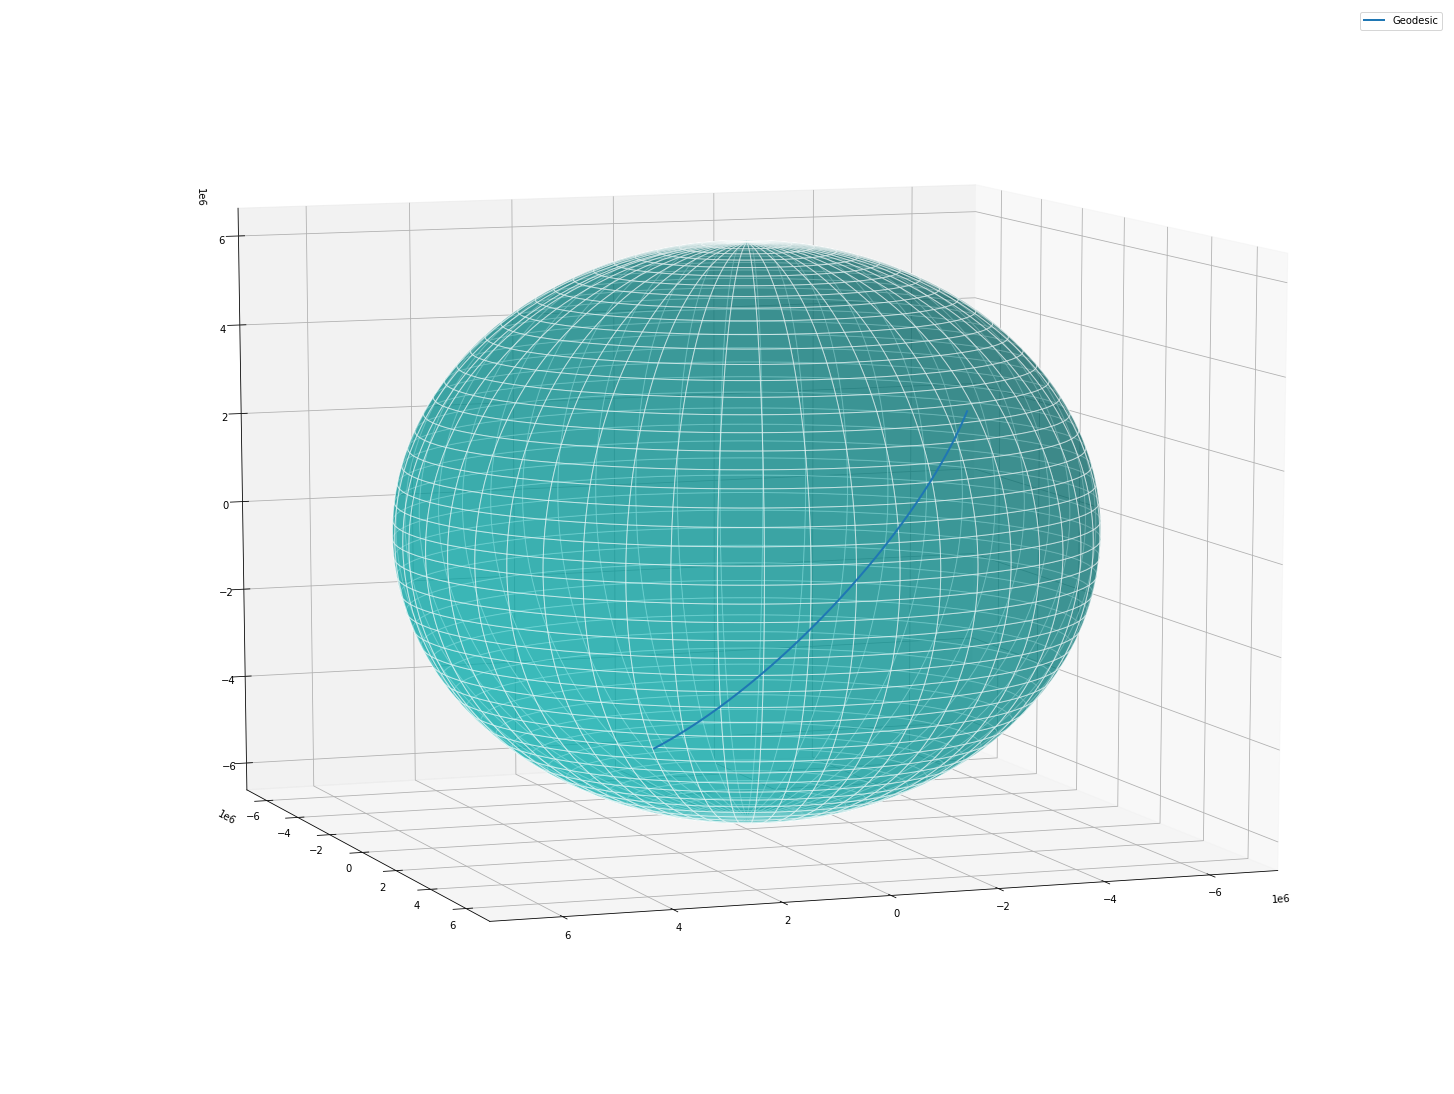

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
xs = a*np.sin(phi)*np.cos(theta)
ys = a*np.sin(phi)*np.sin(theta)
zs = b*np.cos(phi)
plt.rcParams["figure.figsize"] = (20,15)
ax =Axes3D(plt.figure(),azim=70, elev=10)
#ax.scatter(X, Y, Z, label='Geodesic')
ax.plot(X, Y, Z, label='Geodesic',linewidth=2,zorder=3)
surf=ax.plot_surface(xs, ys, zs, color='c', alpha=0.5)
surf.set_edgecolors("white")

ax.legend()

plt.show()

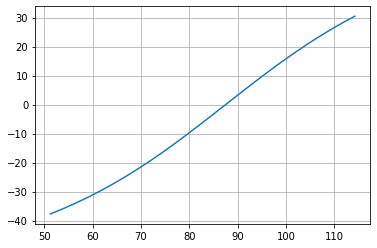

In [ ]:
plt.clf()
plt.plot(Li,Bi)
plt.grid()
plt.show()

#HomeWork
> 108207405 王文智



#1.正算
起點 ( φ= 30°0'0", λ= 108°0'0", A=45°0'0")
S=10^6 m


In [ ]:
def dms2rad(dms):
   rad=(dms[0]+dms[1]/60+dms[2]/3600)/180*pi
   return rad
def lb2xyz(l,b):
   N=a/(1-e2*sin(b)**2)**0.5;
   X =N*cos(b)*cos(l);
   Y =N*cos(b)*sin(l);
   Z =(N*(1-e2))*sin(b);
   return X,Y,Z
from math import *
L1=[108,0,0];B1=[30,0,0];A1=[45,0,0]

B1=dms2rad(B1)
L1=dms2rad(L1)
A1=dms2rad(A1)

a=6378245;b=6356863.018770473;e2=1-b**2/a**2;
X=[lb2xyz(L1,B1)[0]];Y=[lb2xyz(L1,B1)[1]];Z=[lb2xyz(L1,B1)[2]]

w=(1-e2*sin(B1)**2)**0.5
sin_u1=sin(B1)*(1-e2)**0.5/w
cos_u1=cos(B1)/w

sin_A0=cos_u1*sin(A1)
cos2_A0=1-sin_A0**2
k2=(a**2/b**2-1)*cos2_A0

A=b*(1+k2/4-3/64*k2**2+5/256*k2**3)
B=b*(k2/8-k2**2/32+15/1024*k2**3)
C=b*(k2**2/128-3/512*k2**3)
alp=(e2/2+e2**2/8+e2**3/16)-(e2**2+e2**3)*cos2_A0/16+3*e2**3*cos2_A0**2/128
beta=(e2**2+e2**3)*cos2_A0/32-e2**3*cos2_A0**2/64

cot_sig1=cos_u1*cos(A1)/sin_u1
sin_2sig1=2*cot_sig1/(cot_sig1**2+1)
cos_2sig1=(cot_sig1**2-1)/(cot_sig1**2+1)

def geodesic(S):
   sig0=(S-(B+C*cos_2sig1)*sin_2sig1)/A
   
   sig=sig0+(B+5*C*(cos_2sig1*cos(2*sig0)-sin_2sig1*sin(2*sig0)))*(sin_2sig1*cos(2*sig0)+cos_2sig1*sin(2*sig0))/A
   delt=(alp*sig+beta*(sin_2sig1*cos(2*sig0)+cos_2sig1*sin(2*sig0)-sin_2sig1))*sin_A0
   sin_u2=sin_u1*cos(sig)+cos_u1*cos(A1)*sin(sig)
   B2=atan(sin_u2/(1-e2)**0.5/(1-sin_u2**2)**0.5)
   lam_i=atan(sin(A1)*sin(sig)/(cos_u1*cos(sig)-sin_u1*sin(sig)*cos(A1)))
   
   if (sin(A1)*tan(lam_i)>0) :
      lam=abs(lam_i)
   else:
      lam=abs(lam_i)-pi
   if (tan(lam_i)<0) :
      lam=-lam
   
   L2=L1+lam-delt
   A2=atan(cos_u1*sin(A1)/(cos_u1*cos(sig)*cos(A1)-sin_u1*sin(sig)))
   
   if (sin(A1)<0) :
      A2=abs(A2)
   else:
      A2=-abs(A2)
   if (sin(A1)*tan(A2)>0) :
      A2=pi-A2
   return L2,B2,A2
def rad2dms(rad):
   deg=rad*180/pi
   d=int(deg)
   ms=(deg-d)*60
   m=int(ms)
   s=(ms-m)*60
   dms=[d,m,s]
   return dms
Li=[L1*180/pi];Bi=[B1*180/pi];Ai=[A1*180/pi]

for s in range(10000):
    [L2,B2,A2]=geodesic(100*(s+1))
    Li.append(L2*180/pi)
    Bi.append(B2*180/pi)
    Ai.append(-A2*180/pi)
    [Xi,Yi,Zi]=lb2xyz(L2,B2)
    X.append(Xi)
    Y.append(Yi)
    Z.append(Zi)
Xp=[X[0],X[5000],X[-1]]
Yp=[Y[0],Y[5000],Y[-1]]
Zp=[Z[0],Z[5000],Z[-1]]
L2=rad2dms(L2)
B2=rad2dms(B2)
A2=rad2dms(-A2)
print(L2,B2,A2)

[115, 50, 56.270334752309736] [36, 8, 36.097248752606674] [49, 17, 38.391477845282225]


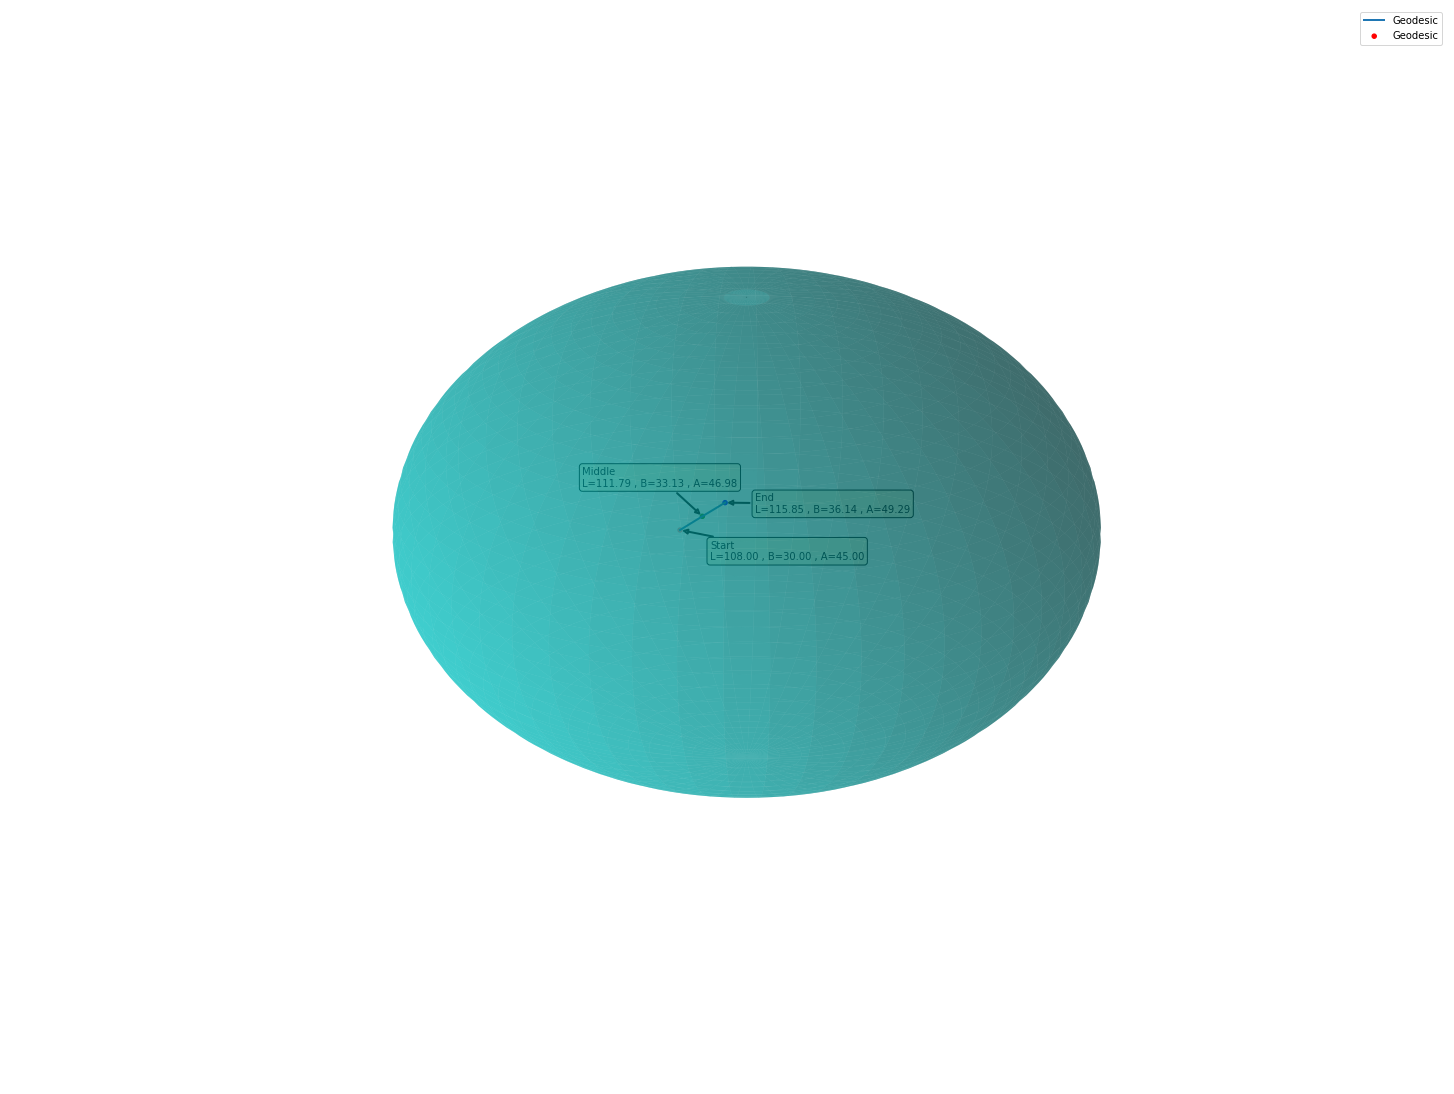

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''
    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)
setattr(Axes3D, 'annotate3D', _annotate3D)

phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
xs = a*np.sin(phi)*np.cos(theta)
ys = a*np.sin(phi)*np.sin(theta)
zs = b*np.cos(phi)

plt.rcParams["figure.figsize"] = (20,15)

ax =Axes3D(plt.figure(),azim=120, elev=30)
ax.set_axis_off()

ax.plot(X, Y, Z, label='Geodesic',linewidth=2,zorder=3)
ax.scatter(Xp, Yp, Zp, label='Geodesic',color=['r','g','b'],zorder=1)
surf=ax.plot_surface(xs, ys, zs, color='c', alpha=0.5)
pointN=['Start','Middle','End']
position=[(30,-30),(-120,30),(30,-10)]
for i in [0,1,2]:
    l=i*5000
    text='{}\nL={:.2f} , B={:.2f} , A={:.2f}'.format(pointN[i],Li[l],Bi[l],Ai[l])
    ax.annotate3D(text, (Xp[i], Yp[i], Zp[i]),
              xytext=position[i],
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=2))
ax.legend()

plt.show()

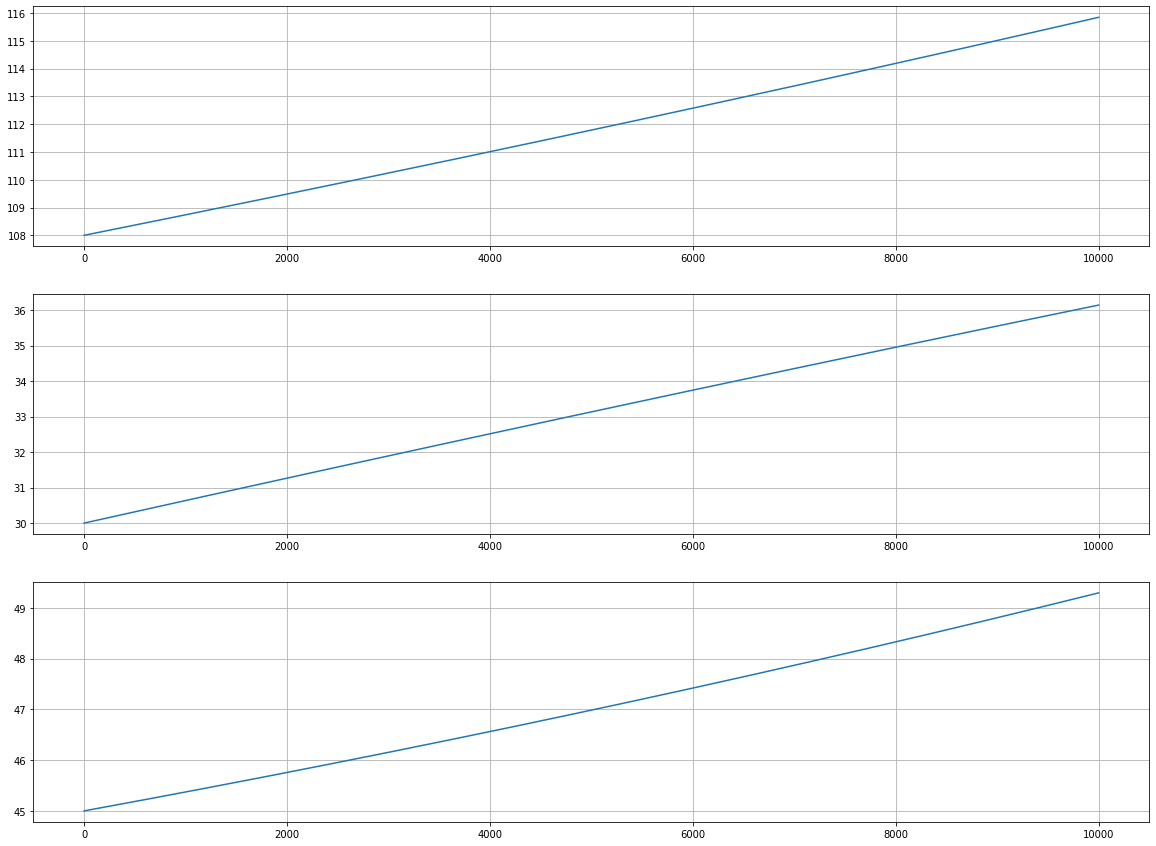

In [ ]:
plt.clf()
plt.subplot(3,1,1)
plt.plot(Li)
plt.grid()
plt.subplot(3,1,2)
plt.plot(Bi)
plt.grid()
plt.subplot(3,1,3)
plt.plot(Ai)
plt.grid()
plt.show()

#2.反算

In [ ]:
def Geodesic_reverse(L1,B1,L2,B2):
  a=6378245;b=6356863.0187730473;e2=1-b**2/a**2;f=1-b/a;
  L1=dms2rad(L1)
  B1=dms2rad(B1)
  L2=dms2rad(L2)
  B2=dms2rad(B2)

  b1 = atan((1-f)*tan(B1)); 
  b2 = atan((1-f)*tan(B2)); 

  lam_0= L2-L1; 

  def  delta_iteration(del0):
    lam=lam_0+del0
    x = cos(b2)*sin(lam);    
    y = cos(b1)*sin(b2) - sin(b1)*cos(b2)*cos(lam);     
    sin_sig = (x**2 + y**2)**0.5;     
    cos_sig = sin(b1)*sin(b2) + cos(b1)*cos(b2)*cos(lam);     
    sig = atan(sin_sig/cos_sig);     
    if (cos_sig>0):
      sig=abs(sig)
    else:
      sig=math.pi-abs(sig)
    sin_E = cos(b1)*cos(b2)*sin(lam)/sin_sig;     
    # cos_2s = cos(2*sig1)    
    cos2_E=1-sin_E**2
    cos_2s = cos_sig - (2*sin(b1)*sin(b2)/cos2_E);     
    # Compute Vincenty's constant C     
    C = f/16*cos2_E*(4+f*(4-3*cos2_E));     
    # Compute delt            
    delt = (1-C)*f*sin_E*(sig+C*sin_sig*(cos_2s+C*cos_sig*(-1+2*cos_2s**2)));    
    if abs(delt-del0)>1e-30:
      [lam,sig,cos_2s,sin_E] =delta_iteration(delt);
    return [lam,sig,cos_2s,sin_E]  
  [lam,sig,cos_2s,sin_E] =delta_iteration(0)
  print(206264.8*(lam-lam_0))
  u2 = (a**2/b**2-1)*(1-sin_E**2)
  A = 1 + u2/16384*(4096 + u2*(-768 + u2*(320-175*u2))); 
  B = u2/1024*(256 + u2*(-128 + u2*(74-47*u2)));
  t1 = 2*cos_2s**2-1; 
  t2 = -3+4*sin(sig)*sin(sig); 
  t3 = -3+4*cos_2s**2; 
  S = b*A*(sig-B*sin(sig)*(cos_2s+B/4*(cos(sig)*t1-B/6*cos_2s*t2*t3)));
  def xy2azi(x,y):
    Azi=atan(y/x)
    if (y*x>0):
      Azi=abs(Azi)
    else:
      Azi=-abs(Azi)
    if (x<0):
      Azi=math.pi+Azi
    return Azi
  A1=xy2azi ( cos(b1)*sin(b2)-sin(b1)*cos(b2)*cos(lam) , cos(b2)*sin(lam) )
  A2=xy2azi ( cos(b1)*sin(b2)*cos(lam)-sin(b1)*cos(b2) , cos(b1)*sin(lam) )-math.pi
  if A2<0:
    A2+=2*math.pi
  A1=rad2dms(A1)
  A2=rad2dms(A2)

  print(A1,A2,S)
  return [A1,A2,S]

(1) 同一經圈（同經度）

In [ ]:
[A1,A2,S]=Geodesic_reverse(L1=[114,20,0],B1=[30,30,0],L2=[114,20,0],B2=[-37,-43,-44.1351])

0.0
[180, 0, 0.0] [0, 0, 0.0] 7553086.182891437


大地線沿著子午線（正南﹨正北 方向）

(2) 同一平行圈（同緯度）

In [ ]:
[A1,A2,S]=Geodesic_reverse(L1=[114,20,0],B1=[30,30,0],L2=[51,16,32.4976],B2=[30,30,0])

-533.6457047955207
[-72, -41, -53.9754651326939] [72, 41, 53.9754651326939] 5967530.559268753


大地線沿大圓 而非 平行圈